<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
import json
import pandas as pd
import os,sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re
from datetime import datetime, date, timedelta
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
#Opening and loading the json 
f = open('result.json', encoding='utf8')
data = json.load(f)

#Retreive only the messages tag from json

msgs = data['messages']
dmain = pd.DataFrame(msgs)

dmain['from_who']=dmain['actor']
dmain['from_who'] = dmain['from_who'].replace(np.nan, 0)
dmain['from_who_id']=dmain['actor_id']
dmain['from_who_id'] = dmain['from_who_id'].replace(np.nan, 0)
dmain['to_who'] = ''
i=0

chars_to_remove=['[',']','{','}','\\n',"'"]
rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
while i < int(len(dmain)):
    if dmain['from_who'][i]==0:
        dmain.loc[i,['from_who']] = dmain['from'][i]
    if dmain['from_who_id'][i]==0:
        dmain.loc[i,['from_who_id']] = dmain['from_id'][i]
    if type(dmain['text'][i])==list:
        if str(type(dmain['text'][i][0]))=="<class 'dict'>":
            dmain.loc[i,['to_who']]=dmain['text'][i][0]["text"].replace('@','')
            dmain.loc[i,['text']]=str(dmain['text'][i][1:])
    dmain.loc[i,['text']] = re.sub(rx, '', str(dmain['text'][i])).replace('\n','').lower()
    i+=1

dmain=dmain[['type', 'date', 'from_who', 'from_who_id', 'to_who', 'text']].loc[dmain['text']!='']
dmain['date']=dmain['date'].str.replace('T', '-')
dmain['date']=pd.to_datetime(dmain['date'], format='%Y-%m-%d-%H:%M:%S')
dmain

,type,date,from_who,from_who_id,to_who,text
0,message,2021-02-01 11:35:12,Andrey Chikishev,user431142189,,"привет, если в tg ничего не изменилось, то к б..."
1,message,2021-02-01 14:49:36,Евгения Петракова,user761099085,,не работает бот
3,message,2021-02-01 14:50:30,Евгения Петракова,user761099085,,срочно прошу проверить
4,message,2021-02-01 14:56:04,Andrey Chikishev,user431142189,,здравствуйте что значит не работает? не отвеча...
5,message,2021-02-01 15:00:56,Евгения Петракова,user761099085,,не отвечает
...,...,...,...,...,...,...
8327,message,2022-01-17 22:41:52,Отец Стентон,user190521897,,ну и хорошо бы координаты бойца по 1с для связ...
8328,message,2022-01-17 22:50:41,Andrei Enz,user548664418,,всем добрый день. хотелось бы уточнить по итог...
8329,message,2022-01-17 22:52:37,Алексей Железняк,user915135877,,"андрей, спасибо за вопросы, пошел за ответами,..."
8330,message,2022-01-17 23:48:16,Отец Стентон,user190521897,,"а вот и андрюха из ада 1с подтянулся, а он зна..."


Активность ночью (с 0:00 до 6:00): 0.06%
Активность утром (с 6:00 до 12:00): 0.22%
Активность днем (с 12:00 до 18:00): 0.44%
Активность вечером (с 18:00 до 0:00): 0.28%
Оператору следует проверять группу минимум дважды в день: перед обедом и вечером - именно тогда набирается набольшее число вопросов


C:\Users\nevge\AppData\Local\Temp/ipykernel_4628/4030887318.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\nevge\AppData\Local\Temp/ipykernel_4628/4030887318.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\nevge\AppData\Local\Temp/ipykernel_4628/4030887318.py:33: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



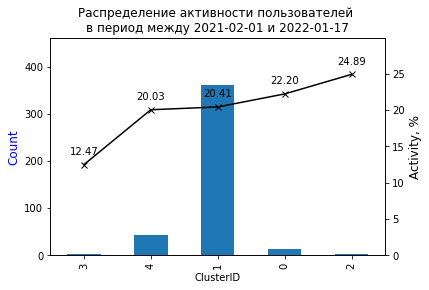

Распрежделение крайне не равномерно.

Всего 4.49% (19 человек) активных пользователей формируют 99% активности группы
При этом 43.03% (217 человек) активных пользователей оставили 1-3 сообщения (вступили ради 1-2 вопросов и сказали "спасибо")
Как минимум 217 человек может в скором времени покинуть канал, если в нем не будет происходить какой-либо дополнительной активности, способной их заинтересовать (розыгрыши, статьи, рубрики и прочее)
В группе есть 19 очень активных пользователей, которые помогают работе оператора и создают 99% активности группы. Необходимо предусмотреть мотивацию таких людей (призы или бесплатные тарифы). Бесплатно их можно мотивировать, предусмотрев некий еженедельный топ активных пользователей - людям приятно занимать высокие места.


C:\Users\nevge\AppData\Local\Temp/ipykernel_4628/4030887318.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nevge\AppData\Local\Temp/ipykernel_4628/4030887318.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Можно сделать выводы, что в период с 2021-02-01 по 2022-01-17 имеется умеренно возрастающий темп как активности так и полезности канала, хотя и рост этот достаточно скромный. Одно этот показатель говорит только о среднедневной активности. В то время как большинство пользователей подписываются на канал с целью 1-2 двух вопросов и больше не ведут никакой активности уже тот факт, что тренд не имеет нисходящей тенденции говорит о хорошей динамике.
Так же позитивным можно назвать тот факт, что на фоне сохранения активности, тренд полезности так же не имеет нисходящей тенденции. Иначе бы это говорило о явном снижении полезности канала.
Для более удобного анализа такого важного показателя можно было бы ввести опцию оценки полезности, а так же кнопку "спасибо", позволяющую оценивать полезность канала в динамике
Рост или сохранение активности при снижении полезности означали бы крайне негативную тенеденцию, при которой небходимо либо повышать качество ответов на вопросы, либо бороться с "флудом

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

night_activity=dmain[dmain['date'].dt.hour>=0][dmain['date'].dt.hour<6]
morning_activity=dmain[dmain['date'].dt.hour>=6][dmain['date'].dt.hour<12]
day_activity=dmain[dmain['date'].dt.hour>=12][dmain['date'].dt.hour<18]
evening_activity=dmain[dmain['date'].dt.hour>=18]
print('Активность ночью (с 0:00 до 6:00): {:.2f}%'.format(float(int(len(night_activity))/int(len(dmain)))))
print('Активность утром (с 6:00 до 12:00): {:.2f}%'.format(float(int(len(morning_activity))/int(len(dmain)))))
print('Активность днем (с 12:00 до 18:00): {:.2f}%'.format(float(int(len(day_activity))/int(len(dmain)))))
print('Активность вечером (с 18:00 до 0:00): {:.2f}%'.format(float(int(len(evening_activity))/int(len(dmain)))))
print('Оператору следует проверять группу минимум дважды в день: перед обедом и вечером - именно тогда набирается набольшее число вопросов')

user_activity=pd.DataFrame(dmain['from_who'].value_counts(normalize=True))
user_activity['total_msgs']=dmain['from_who'].value_counts()
top_users=user_activity[user_activity['from_who']>=0.01]


kmeans = KMeans(n_clusters=5, random_state=2050)
pred=kmeans.fit_predict(user_activity[['from_who']])
user_activity['ClusterID'] = pred
pd.DataFrame(user_activity.ClusterID.value_counts(normalize=True))
Bar = pd.DataFrame(user_activity[['from_who', 'ClusterID']]).set_index('ClusterID').groupby(['ClusterID']).sum().sort_values('from_who')*100
Bar['Count'] = pd.DataFrame(user_activity.ClusterID.value_counts(normalize=False))
X = (Bar.sort_index().index.values).tolist()
Y = Bar['Count'].max()+100
ax = Bar['Count'].plot(kind='bar')
ax.set_ylabel("Count",color="blue",fontsize=12)
ax.set_ylim(0,Y)
plt.xlabel('ClusterID')
ax2=ax.twinx()
Y = Bar['from_who'].max()+5
plt.plot(X,Bar['from_who'],'bx-', color="black")
ax2.set_ylabel("Activity, %",color="black",fontsize=12)
ax2.set_ylim(0,Y)
for x,y in zip(Bar.sort_index().index.values,Bar['from_who']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center', color="black", fontsize=10)
plt.title('Распределение активности пользователей \nв период между {} и {}'.format(dmain['date'].min().date(), dmain['date'].max().date()))
plt.show()

print('Распрежделение крайне не равномерно.')
print('\nВсего {:.2f}% ({} человек) активных пользователей формируют 99% активности группы'.format(int(len(top_users))/int(len(user_activity))*100, int(len(top_users))))
print('При этом {:.2f}% ({} человек) активных пользователей оставили 1-3 сообщения (вступили ради 1-2 вопросов и сказали "спасибо")'.format(
    int(len(user_activity[user_activity['total_msgs']<=2]))/int(len(user_activity))*100, 
int(len(user_activity[user_activity['total_msgs']<=3]))
))
print('Как минимум {} человек может в скором времени покинуть канал, если в нем не будет происходить какой-либо дополнительной активности, способной их заинтересовать (розыгрыши, статьи, рубрики и прочее)'.format(int(len(user_activity[user_activity['total_msgs']<=3]))))
print('В группе есть {} очень активных пользователей, которые помогают работе оператора и создают 99% активности группы. Необходимо предусмотреть мотивацию таких людей (призы или бесплатные тарифы). Бесплатно их можно мотивировать, предусмотрев некий еженедельный топ активных пользователей - людям приятно занимать высокие места.'.format(int(len(top_users))))


dm1 = dmain[dmain['date'].dt.year==2021]
dm2 = dmain[dmain['date'].dt.year==2022]
dm1['day']=dmain['date'].dt.day_of_year
dm2['day']=dmain['date'].dt.day_of_year+365
dmain=pd.concat([dm1, dm2])
dm1 = dmain[dmain['text'].str.contains('спасибо|благодарю|сенкью|благодарствую|мерси|сесибон|пасибо|спасибки|пасибки')]

msg_in_time=pd.DataFrame(dmain['day'].value_counts()).sort_index(ascending=True)
greatfull_in_time=pd.DataFrame(dm1['day'].value_counts()).sort_index(ascending=True)

msg_in_time['greatfull']=greatfull_in_time['day']
df = pd.DataFrame(msg_in_time['day'])
df2 = pd.DataFrame(msg_in_time['greatfull'])
df2=pd.DataFrame(df2['greatfull'].replace(np.nan, 0))

size = df.index.values.tolist()
total = df['day'].tolist()
greatfull = df2['greatfull'].tolist()


greatfull_size_regr = LinearRegression()
greatfull_size_res = greatfull_size_regr.fit(np.array(size).reshape(-1,1), np.array(greatfull))
greatfull_fit = greatfull_size_regr.predict(np.array(size).reshape(-1,1))

total_size_regr = LinearRegression()
total_size_res = total_size_regr.fit(np.array(size).reshape(-1,1), np.log(np.array(total)))
total_fit = np.exp(total_size_res.predict(np.array(size).reshape(-1,1)))

fig = make_subplots(specs=[[{"secondary_y": True}]], 
                    subplot_titles=['График трнедов активности и полезности бота в период между {} и {}'.format(dmain['date'].min().date(), dmain['date'].max().date())],
                   x_title='День', 
                    y_title='Сообщений/Благодарностей')
fig.add_trace(
    go.Scatter(x=size, y=total, name="Сообщений в день", mode = "markers", marker_symbol=3, marker_color = "tomato"),
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=size, y=total_fit, mode = "lines",name="Тренд активности", marker_symbol=3, marker_color = "red"), 
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=size, y=greatfull, mode = "markers",name="Благодарностей в день", marker_symbol=14,marker_color = "lightgreen"), 
    secondary_y=True)

fig.add_trace(
    go.Scatter(x=size, y=greatfull_fit, mode = "lines",name="Тренд полезности", marker_color = "green"), 
    secondary_y=True)

fig.show()

print('Можно сделать выводы, что в период с {} по {} имеется умеренно возрастающий темп как активности так и полезности канала, хотя и рост этот достаточно скромный. Одно этот показатель говорит только о среднедневной активности. В то время как большинство пользователей подписываются на канал с целью 1-2 двух вопросов и больше не ведут никакой активности уже тот факт, что тренд не имеет нисходящей тенденции говорит о хорошей динамике.'.format(dmain['date'].min().date(), dmain['date'].max().date()))
print('Так же позитивным можно назвать тот факт, что на фоне сохранения активности, тренд полезности так же не имеет нисходящей тенденции. Иначе бы это говорило о явном снижении полезности канала.')
print('Для более удобного анализа такого важного показателя можно было бы ввести опцию оценки полезности, а так же кнопку "спасибо", позволяющую оценивать полезность канала в динамике')
print('Рост или сохранение активности при снижении полезности означали бы крайне негативную тенеденцию, при которой небходимо либо повышать качество ответов на вопросы, либо бороться с "флудом", спамом и подозрительной активности на канале')